1. What is the role of filters and feature maps in Convolutional Neural Network (CNN)?
  - In a Convolutional Neural Network (CNN), filters and feature maps are the primary components that allow the model to "see" and interpret visual data. While they work together, they represent different stages of the process: one is the tool, and the other is the result.
      - Filters (The Tools)
A filter (also called a kernel) is a small matrix of weights that slides across the input image. Think of it as a specialized lens designed to look for a specific pattern.
      - Feature Maps (The Results)
A feature map is the output produced by applying a filter to the input. If the filter is the "detector," the feature map is the "detection report."

2. Explain the concepts of padding and stride in CNNs(Convolutional Neural Network). How do they affect the output dimensions of feature maps?
  - In Convolutional Neural Networks, Stride and Padding are the "control knobs" that determine how a filter traverses an image and, consequently, what the size of the resulting feature map will be.
      - Stride (The Step Size)
Stride defines the number of pixels the filter moves (shifts) at each step as it scans the input image.
      - Padding (The Border)
Padding involves adding extra "dummy" pixels (usually zeros, called Zero Padding) around the outer edges of the input image before the convolution begins.
      - Impact on Output DimensionsThe relationship between input size, filter size, stride, and padding is governed by a specific mathematical formula.If we have:
          - Input size ($W$)
          - Filter/Kernel size ($K$)
          - Padding ($P$)
          - Stride ($S$)
          - The Output Width ($O$) is calculated as:$$O = \left\lfloor \frac{W - K + 2P}{S} \right\rfloor + 1$$

3. Define receptive field in the context of CNNs. Why is it important for deep architectures?
  - In the context of Convolutional Neural Networks (CNNs), the Receptive Field (RF) is the specific region of the input image that a particular feature in a layer is "looking at."While a single pixel in the first layer only sees a tiny $3 \times 3$ or $5 \times 5$ patch of the original image, a pixel in a much deeper layer might have a receptive field that covers the entire input.
  - The receptive field is essentially the "context" available to a neuron. Its size determines what kind of features the network can learn:

      - Small Receptive Field (Early Layers): The network can only see low-level details like edges, dots, or tiny textures. It’s like looking at a painting through a drinking straw; you can see the brushstrokes, but you don't know what the subject is.

      - Large Receptive Field (Deep Layers): The network can see the "big picture." To recognize a "dog," the network needs a receptive field large enough to encompass the ears, nose, tail, and legs simultaneously to understand their spatial relationship.

4. Discuss how filter size and stride influence the number of parameters in a CNN.
  - 1. The filter size (or kernel size) has a direct, linear relationship with the number of parameters.Each filter consists of a grid of weights. If you have a filter of size $K \times K$ and an input with $C$ channels (e.g., 3 for RGB), the number of parameters for that one filter is:$$\text{Parameters per Filter} = (K \times K \times C) + 1 \text{ (bias)}$$
  - 2. The stride has zero impact on the number of parameters in a specific convolutional layer.Why? Stride only dictates the movement of the filter. Whether a $3 \times 3$ filter moves 1 pixel at a time or jumps 10 pixels at a time, it still only possesses 9 weights (plus a bias).The Indirect Effect: While stride doesn't change the parameters of the current layer, it drastically reduces the output feature map size.

5. Compare and contrast different CNN-based architectures like LeNet, AlexNet, and VGG in terms of depth, filter sizes, and performance.
  - LeNet was designed for simple grayscale images ($32 \times 32$). It established the core "Conv-Pool-Conv-Pool-FC" pattern used today.
  - AlexNet scaled up the CNN concept for the ImageNet challenge ($224 \times 224$ images), utilizing GPUs for the first time.
  - VGG moved away from the "large filter" approach of AlexNet. Instead of trying to see a lot at once with an $11 \times 11$ filter, it used stacks of $3 \times 3$ filters.

6. Using keras, build and train a simple CNN model on the MNIST dataset from scratch. Include code for module creation, compilation, training, and evaluation.

In [5]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 97s 803ms/step - accuracy: 0.1021 - loss: 2.4609
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 141s 791ms/step - accuracy: 0.1019 - loss: 2.4424
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 139s 770ms/step - accuracy: 0.1024 - loss: 2.4237
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 98s 819ms/step - accuracy: 0.1036 - loss: 2.4066
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 136s 771ms/step - accuracy: 0.1010 - loss: 2.3926
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 95s 787ms/step - accuracy: 0.1025 - loss: 2.3760
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 89s 740ms/step - accuracy: 0.1022 - loss: 2.3615
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 89s 742ms/step - accuracy: 0.1018 - loss: 2.3496
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 148s 791ms/step - accuracy: 0.1027 - loss: 2.3351
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 91s 755ms/step - accuracy: 0.1026 - loss: 2.3202
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 141s 748ms/step - accuracy: 0.1012 - loss: 2.3093
Epoch 12/12
12

7.  Load and preprocess the CIFAR-10 dataset using Keras, and create a CNN model to classify RGB images. Show your preprocessing and architecture.

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization later
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flattening and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # 10 output units for 10 classes
])

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.3415 - loss: 1.7671 - val_accuracy: 0.5343 - val_loss: 1.2909
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.5542 - loss: 1.2442 - val_accuracy: 0.5964 - val_loss: 1.1287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6205 - loss: 1.0755 - val_accuracy: 0.6222 - val_loss: 1.0705
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6581 - loss: 0.9699 - val_accuracy: 0.6567 - val_loss: 0.9989
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6913 - loss: 0.8838 - val_accuracy: 0.6851 - val_loss: 0.9111
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7094 - loss: 0.8256 - val_accuracy: 0.6974 - val_loss: 0.8842
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7341 - loss: 0.7594 - val_accuracy: 0.6843 - val_loss: 0.9078
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7420 -

8. Using PyTorch, write a script to define and train a CNN on the MNIST dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.93MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 165kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.56MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.68MB/s]


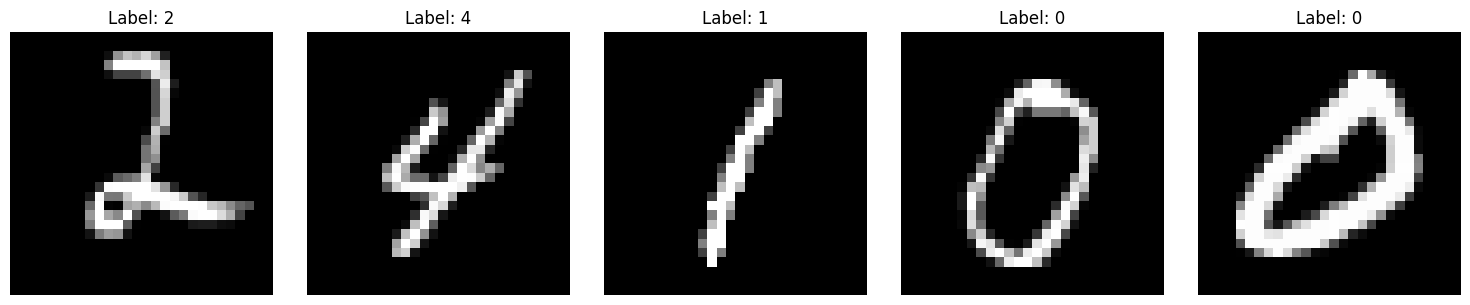

In [9]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def load_mnist(batch_size=5):
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(
        root="./data",
        train=True,
        download=True,
        transform=transform
    )
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def visualize_samples(dataloader, num_samples=5):
    images, labels = next(iter(dataloader))

    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

train_loader = load_mnist(batch_size=5)
visualize_samples(train_loader)